In [1]:
# import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PyPDF2 as pdf

#reading the input dataset companies.txt with separator as "\t" with encoding ISO-8859-1
companies = pd.read_csv("companies.txt", sep = "\t", encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2]:
# reading input from rounds2.csv with encoding
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [3]:
# as the columns 'permalink' and 'company_permalink' is not uniform in case, i convert the columns values 
# to uppercase then merge the dfs
# created a function to convert a string to uppercase
def link_to_upper_case(x):
    return x.upper()
companies['permalink'] = companies['permalink'].apply(link_to_upper_case)
rounds2['company_permalink'] = rounds2['company_permalink'].apply(link_to_upper_case)

In [4]:
#Checkpoint 1:
#count of unique values in companies df
print(len(companies.permalink.unique()))

66368


In [5]:
#Checkpoint 1:
#count of unique values in rounds2 df
print(len(rounds2.company_permalink.unique()))

66370


In [6]:
#Checkpoint 1: unique company_permalinks in rounds2 which are not present in permalinks column of companies df
A = set(list(companies.permalink.unique()))
B = set(list(rounds2.company_permalink.unique()))
C = B.difference(A)
print(C)
print(len(C))

{'/ORGANIZATION/WEICHE-TECH-Å\x96\x82È½¦Ç§\x91Æ\x8a\x80', '/ORGANIZATION/MAGNET-TECH-Ç£\x81Ç\x9f³Ç§\x91Æ\x8a\x80', '/ORGANIZATION/HUIZUCHE-COM-Æ\x83\xa0Ç§ŸÈ½¦', '/ORGANIZATION/ENERGYSTONE-GAMES-Ç\x81ΜÇ\x9f³Æ¸¸Æ\x88\x8f', '/ORGANIZATION/ZENGAME-Ç¦\x85Æ¸¸Ç§\x91Æ\x8a\x80', '/ORGANIZATION/E-CÃ\x8aBICA', '/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²\x99È\x88ŸÄ¿¡Æ\x81¯Ç§\x91Æ\x9a\x80'}
7


In [7]:
#permalinks in companies df that are not present in rounds2 df
D = A.difference(B)
print(D)
print(len(D))

{'/ORGANIZATION/ZENGAME-Ç¦\x85Æ¸¸Ç§\x91Æ\x9a\x80', '/ORGANIZATION/HUIZUCHE-COM-Æ\x83\xa0Ç§\x9fÈ½¦', '/ORGANIZATION/E-CÃ\x9aBICA', '/ORGANIZATION/ENERGYSTONE-GAMES-Ç\x81ΜÇŸ³Æ¸¸Æ\x88\x8f', '/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²\x99È\x88\x9fÄ¿¡Æ\x81¯Ç§\x91Æ\x9a\x80'}
5


In [8]:
#removing rows corresponding to these permalinks in companies
companies = companies.loc[~companies['permalink'].isin(D)]
print(len(companies.index))

66363


In [9]:
#removing rows corresponding to company_permalink in rounds2 which are not present in companies
rounds2 = rounds2.loc[~rounds2['company_permalink'].isin(C)]


In [10]:
print(len(rounds2.company_permalink.unique()))
print(len(rounds2.index.unique()))

66363
114942


In [11]:
#arriving at country name using the country code. 
code = set(companies.country_code)

import requests, json

def get_country_name(code):
    url = "https://restcountries.eu/rest/v2/alpha/{0}".format(code)
    r = requests.get(url)
    r_dict = json.loads(r.text)
    return r_dict.get("name")

country_code_map = {}
for x in code:
    country_code_map[x] = get_country_name(x)
#print(country_code_map)



In [12]:
# merging companies dataframe to rounds2 dataframe

master_frame = pd.merge(companies, rounds2, how = 'left', left_on = ['permalink'], right_on=['company_permalink'])
#del master_frame['company_permalink']
master_frame.tail(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114940,/ORGANIZATION/ÃASYS-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114941,/ORGANIZATION/Ä°NOVATIFF-REKLAM-VE-TANÄ±TÄ±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/Ä°NOVATIFF-REKLAM-VE-TANÄ±TÄ±M-H...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [13]:
#Checkpoint 1: Number of observations in master_frame
print(len(master_frame.index))

114942


In [14]:
#cleaning columns
#summing up missing values in each of the column of master_frame and displaying it as percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [15]:
#Observation:
#removal of company_permalink column which has duplicate values of permalink
master_frame = master_frame.drop('company_permalink', axis =1)
# Funding_round_code has 72% null values. Since we are not performing any analysis based on this column, we will drop the col
master_frame = master_frame.drop('funding_round_code', axis=1)
# founded_at has 17% null values. dropping this column too as it doesnt impact our analysis
master_frame = master_frame.drop('founded_at', axis=1)
#homepage_url having 5% null values also have no significance in our analysis
master_frame = master_frame.drop('homepage_url',axis=1)

In [16]:
#summing up missing values in each of the column of master_frame and displaying it as percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [17]:
#cleaning rows
#Checkpoint 2: 
# Spark funds wants to invest money in range of 5M to 15M only, we will consider raise_amount_usd column value in this range
funding_analysis = master_frame.loc[((master_frame['raised_amount_usd'] >= 5000000)
                                     &(master_frame['raised_amount_usd'] <= 15000000)),:]
#summing up missing values in each of the column of funding_analysis and displaying it as percentage
round(100*(funding_analysis.isnull().sum()/len(funding_analysis.index)),2)

permalink                  0.00
name                       0.00
category_list              1.24
status                     0.00
country_code               4.30
state_code                 5.75
region                     5.43
city                       5.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [18]:
#Total number of observation is funding_analysis dataframe
print(len(funding_analysis.index))

18848


In [19]:
print(len(funding_analysis.loc[~(funding_analysis['category_list'].isnull())]))

18615


In [20]:
#observation
# out of 18848 records in funding_analysis dataframe, 1% of data doesnt contain any value for category_list
# removing all rows where category_list is null
funding_analysis = funding_analysis.loc[~(funding_analysis['category_list'].isnull())]
#summing up missing values in each of the column of funding_analysis and displaying it as percentage
round(100*(funding_analysis.isnull().sum()/len(funding_analysis.index)),2)

permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               3.91
state_code                 5.35
region                     5.04
city                       5.03
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [21]:
#observation: City, state, region, country_code are not required for funding type analysis
funding_analysis = funding_analysis.drop('country_code',axis=1)
funding_analysis = funding_analysis.drop('state_code',axis=1)
funding_analysis = funding_analysis.drop('region',axis=1)
funding_analysis = funding_analysis.drop('city',axis=1)
#summing up missing values in each of the column of funding_analysis and displaying it as percentage
round(100*(funding_analysis.isnull().sum()/len(funding_analysis.index)),2)


permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [22]:
#number of records for funding type analysis
print(len(funding_analysis.index))

18615


In [23]:
#requirement says that 
#"This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s."
#so, we remove rows with 'seed' and 'angel' category_list for those companies that have already reached venture stage
cos_venture = funding_analysis.loc[(funding_analysis.funding_round_type == 'venture'),['permalink']]

#set of companies at funding_round_type level 'venture'
set_cos_venture = set(list(cos_venture['permalink']))

#selecting the records with funding_round_type 'seed', 'angel' for companies already in 'venture' stage

rem_dup = funding_analysis.loc[~((funding_analysis['permalink'].isin(set_cos_venture)) & (funding_analysis['funding_round_type'] == 'seed') | 
                        ( (funding_analysis['permalink'].isin(set_cos_venture)) & (funding_analysis['funding_round_type'] == 'angel'))),:]
print('after removal of duplicate seed and angel:' + str(len(rem_dup.index)))


after removal of duplicate seed and angel:18566


In [24]:
#creating a pivot table to compare median funding amount across funding_round_type
rem_dup.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc='median')

,raised_amount_usd
funding_round_type,
angel,6800000.0
convertible_note,6925436.5
debt_financing,7500000.0
equity_crowdfunding,6000000.0
grant,8100000.0
non_equity_assistance,15000000.0
post_ipo_debt,9750000.0
post_ipo_equity,9276437.5
private_equity,9473556.0


In [25]:
#creating a pivot table to compare average funding amount across funding_round_type
rem_dup.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc='mean')

,raised_amount_usd
funding_round_type,
angel,7.297153e+06
convertible_note,8.071730e+06
debt_financing,8.277618e+06
equity_crowdfunding,6.615061e+06
grant,8.475851e+06
non_equity_assistance,1.500000e+07
post_ipo_debt,8.793382e+06
post_ipo_equity,9.325944e+06
private_equity,9.273356e+06


In [26]:
# agg function  = median
#angel = 6800000.0 -- 6 million 800 thousand
#seed = 5943536.0 -- five million nine hundred forty-three thousand five hundred thirty-six
#venture = 8270000.0 -- eight million two hundred seventy thousand
#private_equity = 9473556.0 -- nine million four hundred seventy-three thousand five hundred fifty-six

In [27]:
# agg function  = mean
#angel = 7297153.0 -- 7 million
#seed = 6600084.0 -- 6.6 million
#venture = 8889190.0 -- 8.8 million
#private_equity = 9273356.0 -- 9.27 million

In [28]:
#checkpoint 6:
fund_type = rem_dup.loc[((rem_dup['funding_round_type']=='seed')|(rem_dup['funding_round_type']=='venture')|
                              (rem_dup['funding_round_type']=='private_equity'))]


In [29]:
#grouping the df based on status and category_list
rem_dup_grp = rem_dup.groupby(by=['funding_round_type','status'])
rem_dup_grp['status'].count()

funding_round_type     status   
angel                  acquired         4
                       closed           5
                       ipo              1
                       operating       50
convertible_note       acquired         1
                       closed           3
                       ipo              4
                       operating       40
debt_financing         acquired       129
                       closed          55
                       ipo             96
                       operating      584
equity_crowdfunding    acquired         1
                       operating       21
grant                  acquired         5
                       closed           6
                       ipo             15
                       operating      134
non_equity_assistance  operating        1
post_ipo_debt          acquired         2
                       closed           4
                       ipo             28
post_ipo_equity        acquired         7
 

In [30]:
#venture                acquired      3402
#                       closed        1082
#                       ipo            746
#                       operating    11169

#angel                  acquired         4
#                       closed           5
#                       ipo              1
#                       operating       50

#seed                   acquired         4
#                       closed           6
#                       ipo              2
#                       operating      151

#private_equity         acquired        50
#                       closed          26
#                       ipo             67
#                       operating      281

#observation: since the density of investment is more in 'venture' and also median investment amount is in around 8M
#we choose investment type = venture

In [31]:
#Checkpoint 3: Country analysis
# considering all data with funding_round_type as venture


In [32]:
#status of master_frame
#summing up missing values in each of the column of master_frame and displaying it as percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [33]:
#total number of records in master_frame
print(len(master_frame.index))

114942


In [34]:
#chosen investment type = venture

venture_companies = master_frame.loc[master_frame['funding_round_type'] == 'venture']
print(len(venture_companies.index))

55493


In [35]:
venture_companies.head(2)

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN


In [36]:
#summing up missing values in each of the column of venture_companies and displaying it as percentage
round(100*(venture_companies.isnull().sum()/len(venture_companies.index)),2)

permalink                  0.00
name                       0.00
category_list              2.04
status                     0.00
country_code               5.18
state_code                 6.84
region                     6.40
city                       6.40
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          9.49
dtype: float64

In [37]:
#cleaning rows
# 1. category_list has 2% null values, for country analysis we just check the total amount invested in each country irrespective of 
# the type of company
# the col category_list can be dropper, but the same would be needed for performing the sector analysis in checkpoint 4
# so, we will ignore the category_list columns for country analysis
# 2. country_code has 5% null values, we now reduce the null values here by removing those columns where location details are not 
# provided at all

venture_companies = venture_companies.loc[~((venture_companies['city'].isnull())&(venture_companies['region'].isnull())
                &(venture_companies['state_code'].isnull())
                 &(venture_companies['country_code'].isnull()))]

print(len(venture_companies))


52619


In [38]:
#summing up missing values in each of the column of venture_companies and displaying it as percentage
round(100*(venture_companies.isnull().sum()/len(venture_companies.index)),2)

permalink                  0.00
name                       0.00
category_list              1.13
status                     0.00
country_code               0.00
state_code                 1.75
region                     1.29
city                       1.29
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          8.57
dtype: float64

In [39]:
# country code is not null now, state_code, region and city columns are not needed for country analysis
venture_companies = venture_companies.drop('state_code', axis=1)
venture_companies = venture_companies.drop('region', axis=1)
venture_companies = venture_companies.drop('city', axis=1)
#summing up missing values in each of the column of venture_companies and displaying it as percentage
round(100*(venture_companies.isnull().sum()/len(venture_companies.index)),2)

permalink                  0.00
name                       0.00
category_list              1.13
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          8.57
dtype: float64

In [40]:
#total rows in venture_companies
print(len(venture_companies.index))
#total rows where raised_amount_usd is null
print(len(venture_companies.loc[venture_companies['raised_amount_usd'].isnull()]))

52619
4508


In [41]:

venture_companies['raised_amount_usd'].describe()

count    4.811100e+04
mean     1.173578e+07
std      8.795109e+07
min      0.000000e+00
25%      1.603912e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [42]:
#around 9% of the data has null in raised_amount_usd, we will delete those rows as there is significant variation in amount
venture_companies = venture_companies[~(np.isnan(venture_companies['raised_amount_usd']))]
#summing up missing values in each of the column of venture_companies and displaying it as percentage
round(100*(venture_companies.isnull().sum()/len(venture_companies.index)),2)

permalink                  0.00
name                       0.00
category_list              0.63
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [43]:
#creation of dataframe containing total investment amount each country has received
top9_groupby = venture_companies.groupby('country_code')
countries = pd.DataFrame(top9_groupby.sum())
top9_sorted = countries.sort_values(by='raised_amount_usd', ascending= False)

In [44]:
top9 = top9_sorted.head(9)
top9.reset_index(inplace=True)
top9 #checkpoint 4

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


In [45]:
#get the country names using the index of sorted top9 dataframe

print([country_code_map.get(key) for key in top9.country_code] )

['United States of America', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'India', 'Canada', 'France', 'Israel', 'Germany', 'Japan']


In [46]:
#The above list values have to be manually compared with the Official english speaking countries Pdf shared
# by manual comparison, it following were the top3 english speaking countries
#United States
#United Kingdom
#India
country_1 = 'USA'
country_2 = 'GBR'
country_3 = 'IND'

In [47]:
#creating a dataframe for the mapping csv
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head()
#it is observed that the category_list contains some incorrect data which needs to be corrected
#for example: Analytics is mentioned as A0lytics

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [48]:
#Checkpoint 4
#cleaning data
#creating a copy of mapping and operate upon it
mapping1 = mapping.copy()

In [49]:
def rename_cat(cat):
    if '0' in str(cat):
        return str(cat).replace("0","na")
    else:
        return str(cat)
        
#correcting category_list in the copy    

mapping1['category_list'] = mapping1['category_list'].apply(rename_cat)


In [50]:
#creating a function to fetch the primary category for the column category_list
def category(category_list):
    if '|' in category_list:
        primary = category_list.split('|')
        return primary[0]
    else:
        return category_list

#adding a new column in venture_companies dataframe with name as primary_category, value of which is arrived by applying category()
venture_companies['primary_sector'] = [category(str(x)) for x in venture_companies.category_list]
venture_companies[['category_list','primary_sector']].head()

,category_list,primary_sector
0,Media,Media
4,Curated Web,Curated Web
8,Biotechnology,Biotechnology
10,Analytics,Analytics
11,Analytics,Analytics


In [51]:
venture_companies.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
4,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web


In [52]:
#creating a dictionary for mapping sectors
col_mapping = mapping.columns

col_map_dict = {}
for i in range(1,len(col_mapping)):
    col_map_dict[i] = col_mapping[i]

print(col_map_dict)

{1: 'Automotive & Sports', 2: 'Blanks', 3: 'Cleantech / Semiconductors', 4: 'Entertainment', 5: 'Health', 6: 'Manufacturing', 7: 'News, Search and Messaging', 8: 'Others', 9: 'Social, Finance, Analytics, Advertising'}


In [53]:
# to map each row with primary sector
# creating a (m*n) array from mapping df
a = mapping1.iloc[:,1:10]
A = np.array(a)
#creating a one dimensional array with keys corresponding to the sector values, so that it can be mapped using the dictionary 
#creted above
B= np.arange(1,10)

#performing dot product of two array, resultant will be a (m*1) array with each row having key value of the sector
psec = np.dot(A,B)

#performing reverse mapping of key values to get the sector names saving it as a list
psec_mapped_list = [col_map_dict.get(x) for x in list(psec)]

#adding new column named 'primary_sector' 
mapping1['main_sector'] =(psec_mapped_list)


#creating a new dataframe with category_list and primary_sector which can be merges with venture_companies 
mapping_prim_sec = mapping1[['category_list','main_sector']]
mapping_prim_sec.head()

,category_list,main_sector
0,nan,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [54]:
#merging venture_companies with mapping_prim_sec dataframes, new dataframe will contain primary_sector as a separate column

venture_comp_sector_mapped = pd.merge(venture_companies,mapping_prim_sec, how = 'left', left_on = 'primary_sector', right_on='category_list')


In [55]:
#viewing dataframe after merge
venture_comp_sector_mapped.head(5)

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Media,Entertainment
1,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,Curated Web,"News, Search and Messaging"
2,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [56]:
#primary_sector and category_list_y are two columns with same value. deleting the columns category_list_y from the df
del venture_comp_sector_mapped['category_list_y']

venture_comp_sector_mapped.head() ## checkpoint 4

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
2,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology,Cleantech / Semiconductors
3,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics,"Social, Finance, Analytics, Advertising"


In [57]:
#Checkpoint 5 
#creation of dataframes D1, D2, D3 with funding amount in range of 5M to 15M USD
d1 = venture_comp_sector_mapped.loc[(venture_comp_sector_mapped['country_code']== country_1)&
                                    (venture_comp_sector_mapped['raised_amount_usd'] <= 15000000)&
                                   (venture_comp_sector_mapped['raised_amount_usd'] >= 5000000)]
d1.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
5,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics,"Social, Finance, Analytics, Advertising"
6,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps,"News, Search and Messaging"
30,/ORGANIZATION/128-TECHNOLOGY,128 Technology,Service Providers|Technology,operating,USA,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,Service Providers,Others
34,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,Manufacturing,Manufacturing
35,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,Manufacturing,Manufacturing


In [58]:
#D1 count and sum per main_sector
D1_count_main_sector = d1.groupby('main_sector')
D1_count = pd.DataFrame(D1_count_main_sector['permalink'].count())
D1_count.reset_index(inplace = True)

D1_sum = pd.DataFrame(D1_count_main_sector['raised_amount_usd'].sum())
D1_sum.reset_index(inplace = True)

D1_add = pd.merge(D1_count, D1_sum, how = 'inner', on = 'main_sector')

D1_add.columns=['main_sector','count_per_sector','total_investment_per_sector']


In [59]:
#merge with d1

D1 = pd.merge(d1, D1_add, how = 'inner', on = 'main_sector')
#D1.to_csv("F:/Course/EDA/Project/D1.csv")
D1.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,count_per_sector,total_investment_per_sector
0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
1,/ORGANIZATION/21E6,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,17-11-2013,5050000.0,Big Data,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
2,/ORGANIZATION/33ACROSS,33Across,Advertising|Advertising Platforms|Content Disc...,operating,USA,/funding-round/a45d977b48cb54216eb705d59b24ca19,venture,19-07-2012,13100000.0,Advertising,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
3,/ORGANIZATION/33ACROSS,33Across,Advertising|Advertising Platforms|Content Disc...,operating,USA,/funding-round/bfc2233768b7c79ed58ad7561423e555,venture,05-01-2011,9000000.0,Advertising,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
4,/ORGANIZATION/360COMMERCE,360Commerce,Information Technology|Retail|Software,acquired,USA,/funding-round/1c51042e815e96ed2653ae9ced99dfc4,venture,29-10-2003,12000000.0,Information Technology,"Social, Finance, Analytics, Advertising",2714,2.380738e+10


In [60]:
#D2
d2 = venture_comp_sector_mapped.loc[(venture_comp_sector_mapped['country_code']== country_2)&
                                    (venture_comp_sector_mapped['raised_amount_usd'] <= 15000000)&
                                   (venture_comp_sector_mapped['raised_amount_usd'] >= 5000000)]
d2.head()
#D2 count and sum per main_sector
D2_count_main_sector = d2.groupby('main_sector')

D2_count = pd.DataFrame(D2_count_main_sector['permalink'].count())
D2_count.reset_index(inplace = True)
D2_sum = pd.DataFrame(D2_count_main_sector['raised_amount_usd'].sum())
D2_sum.reset_index(inplace = True)

D2_add = pd.merge(D2_count, D2_sum, how = 'inner', on = 'main_sector')

D2_add.columns=['main_sector','count_per_sector','total_investment_per_sector']

D2 = pd.merge(d2, D2_add, how = 'inner', on = 'main_sector')
D2.head(2)

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,count_per_sector,total_investment_per_sector
0,/ORGANIZATION/365SCORES,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,Android,"Social, Finance, Analytics, Advertising",133,1.089404e+09
1,/ORGANIZATION/ACAL-ENTERPRISE-SOLUTIONS,Acal Enterprise Solutions,Information Technology,operating,GBR,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10720178.0,Information Technology,"Social, Finance, Analytics, Advertising",133,1.089404e+09


In [61]:
#D3
d3 = venture_comp_sector_mapped.loc[(venture_comp_sector_mapped['country_code']== country_3)&
                                    (venture_comp_sector_mapped['raised_amount_usd'] <= 15000000)&
                                   (venture_comp_sector_mapped['raised_amount_usd'] >= 5000000)]
d3.head()
#D3 count and sum per main_sector
D3_count_main_sector = d3.groupby('main_sector')

D3_count = pd.DataFrame(D3_count_main_sector['permalink'].count())
D3_count.reset_index(inplace = True)
D3_sum = pd.DataFrame(D3_count_main_sector['raised_amount_usd'].sum())
D3_sum.reset_index(inplace = True)

D3_add = pd.merge(D3_count, D3_sum, how = 'inner', on = 'main_sector')

D3_add.columns=['main_sector','count_per_sector','total_investment_per_sector']

D3 = pd.merge(d3, D3_add, how = 'inner', on = 'main_sector')
D3.head(2)

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,count_per_sector,total_investment_per_sector
0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,33,280830000.0
1,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,Entertainment|Tourism,operating,IND,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,Entertainment,Entertainment,33,280830000.0


In [62]:
D1_add

,main_sector,count_per_sector,total_investment_per_sector
0,Automotive & Sports,167,1.454104e+09
1,Blanks,86,7.647633e+08
2,Cleantech / Semiconductors,2300,2.120663e+10
3,Entertainment,591,5.099198e+09
4,Health,909,8.211859e+09
5,Manufacturing,799,7.258553e+09
6,"News, Search and Messaging",1582,1.395957e+10
7,Others,2950,2.632101e+10
8,"Social, Finance, Analytics, Advertising",2714,2.380738e+10


In [63]:
#Total number of investments in country1(C1)
C1_investment_count = D1_add['count_per_sector'].sum()
print("Total number of investments in country1(C1):" + str(C1_investment_count))
#Total sum of investments in country1(C1)
C1_investment_sum = D1_add['total_investment_per_sector'].sum()
print("Total sum of investments in C1:" + str(C1_investment_sum))

Total number of investments in country1(C1):12098
Total sum of investments in C1:108083057956.0


In [64]:
#checkpoint 5: row 9 col c1

D1_main_sector = D1.loc[D1['main_sector']=='Others']
D1_grp = pd.DataFrame((D1_main_sector.groupby(by='permalink'))['raised_amount_usd'].sum())
top_company_link = (list((D1_grp.sort_values(by='raised_amount_usd', ascending = False).head(1)).index))
print(str(top_company_link[0]))
(D1.loc[D1.permalink == str(top_company_link[0]),['permalink','name']]).head(1)

/ORGANIZATION/VIRTUSTREAM


,permalink,name
7082,/ORGANIZATION/VIRTUSTREAM,Virtustream


In [65]:
#Checkpoint 5 > row 10 col c1
D1_main_sector = D1.loc[D1['main_sector']=='Social, Finance, Analytics, Advertising']
D1_grp = pd.DataFrame((D1_main_sector.groupby(by='permalink'))['raised_amount_usd'].sum())
top_company_link = (list((D1_grp.sort_values(by='raised_amount_usd', ascending = False).head(1)).index))
print(str(top_company_link[0]))
(D1.loc[D1.permalink == str(top_company_link[0]),['permalink','name']]).head(1)

/ORGANIZATION/SHOTSPOTTER


,permalink,name
2065,/ORGANIZATION/SHOTSPOTTER,SST Inc. (Formerly ShotSpotter)


In [66]:
D2_add

,main_sector,count_per_sector,total_investment_per_sector
0,Automotive & Sports,16,1.670516e+08
1,Blanks,7,5.776485e+07
2,Cleantech / Semiconductors,128,1.150140e+09
3,Entertainment,56,4.827847e+08
4,Health,24,2.145375e+08
5,Manufacturing,42,3.619403e+08
6,"News, Search and Messaging",73,6.157462e+08
7,Others,147,1.283624e+09
8,"Social, Finance, Analytics, Advertising",133,1.089404e+09


In [67]:
#Total number of investments in country2(C2)
C2_investment_count = D2_add['count_per_sector'].sum()
print("Total number of investments in country2(C2):" + str(C2_investment_count))
#Total sum of investments in country2(C2)
C2_investment_sum = D2_add['total_investment_per_sector'].sum()
print("Total sum of investments in C2:" + str(C2_investment_sum))

Total number of investments in country2(C2):626
Total sum of investments in C2:5422993148.0


In [68]:
#Checkpoint 5 > row 10 col c2
D2_main_sector = D2.loc[D2['main_sector']=='Social, Finance, Analytics, Advertising']
D2_grp = pd.DataFrame((D2_main_sector.groupby(by='permalink'))['raised_amount_usd'].sum())
top_company_link = (list((D2_grp.sort_values(by='raised_amount_usd', ascending = False).head(1)).index))
print(str(top_company_link[0]))
(D2.loc[D2.permalink == str(top_company_link[0]),['permalink','name']]).head(1)

/ORGANIZATION/CELLTICK-TECHNOLOGIES


,permalink,name
23,/ORGANIZATION/CELLTICK-TECHNOLOGIES,Celltick Technologies


In [69]:
#Checkpoint 5 > row 10 col c2
D2_main_sector = D2.loc[D2['main_sector']=='Others']
D2_grp = pd.DataFrame((D2_main_sector.groupby(by='permalink'))['raised_amount_usd'].sum())
top_company_link = (list((D2_grp.sort_values(by='raised_amount_usd', ascending = False).head(1)).index))
print(str(top_company_link[0]))
(D2.loc[D2.permalink == str(top_company_link[0]),['permalink','name']]).head(1)

/ORGANIZATION/ELECTRIC-CLOUD


,permalink,name
454,/ORGANIZATION/ELECTRIC-CLOUD,Electric Cloud


In [70]:
D3_add.sort_values(by='count_per_sector', ascending = False).head(3)

,main_sector,count_per_sector,total_investment_per_sector
7,Others,110,1.013410e+09
8,"Social, Finance, Analytics, Advertising",60,5.505496e+08
6,"News, Search and Messaging",52,4.338345e+08


In [71]:
#Total number of investments in country3(C3)
C3_investment_count = D3_add['count_per_sector'].sum()
print("Total number of investments in country3(C3):" + str(C3_investment_count))
#Total sum of investments in country3(C3)
C3_investment_sum = D3_add['total_investment_per_sector'].sum()
print("Total sum of investments in C3:" + str(C3_investment_sum))

Total number of investments in country3(C3):330
Total sum of investments in C3:2976543602.0


In [72]:
#Checkpoint 5 > row 9 col c2
D3_main_sector = D3.loc[D3['main_sector']=='Others']
D3_grp = pd.DataFrame((D3_main_sector.groupby(by='permalink'))['raised_amount_usd'].sum())
top_company_link = (list((D3_grp.sort_values(by='raised_amount_usd', ascending = False).head(1)).index))
print(str(top_company_link[0]))
(D3.loc[D3.permalink == str(top_company_link[0]),['permalink','name']]).head(1)

/ORGANIZATION/FIRSTCRY-COM


,permalink,name
65,/ORGANIZATION/FIRSTCRY-COM,FirstCry.com


In [73]:
#Checkpoint 5 > row 10 col c2
D3_main_sector = D3.loc[D3['main_sector']=='Social, Finance, Analytics, Advertising']
D3_grp = pd.DataFrame((D3_main_sector.groupby(by='permalink'))['raised_amount_usd'].sum())
top_company_link = (list((D3_grp.sort_values(by='raised_amount_usd', ascending = False).head(1)).index))
print(str(top_company_link[0]))
(D3.loc[D3.permalink == str(top_company_link[0]),['permalink','name']]).head(1)

/ORGANIZATION/MANTHAN-SYSTEMS


,permalink,name
180,/ORGANIZATION/MANTHAN-SYSTEMS,Manthan Systems


In [74]:
#checkpoint 6: 
d1_top3 = D1_add.sort_values(by='count_per_sector', ascending=False).head(3)
d1_top3['country_code'] = [country_1,country_1,country_1]
d1_top3

,main_sector,count_per_sector,total_investment_per_sector,country_code
7,Others,2950,2.632101e+10,USA
8,"Social, Finance, Analytics, Advertising",2714,2.380738e+10,USA
2,Cleantech / Semiconductors,2300,2.120663e+10,USA


In [75]:
d2_top3 = D2_add.sort_values(by='count_per_sector', ascending=False).head(3)
d2_top3['country_code'] = [country_2,country_2,country_2]
d2_top3

,main_sector,count_per_sector,total_investment_per_sector,country_code
7,Others,147,1.283624e+09,GBR
8,"Social, Finance, Analytics, Advertising",133,1.089404e+09,GBR
2,Cleantech / Semiconductors,128,1.150140e+09,GBR


In [76]:
d3_top3 = D3_add.sort_values(by='count_per_sector', ascending=False).head(3)
d3_top3['country_code'] = [country_3,country_3,country_3]
d3_top3

,main_sector,count_per_sector,total_investment_per_sector,country_code
7,Others,110,1.013410e+09,IND
8,"Social, Finance, Analytics, Advertising",60,5.505496e+08,IND
6,"News, Search and Messaging",52,4.338345e+08,IND


In [77]:
plot_top3 = pd.concat([d1_top3, d2_top3,d3_top3], axis=0)
plot_top3

,main_sector,count_per_sector,total_investment_per_sector,country_code
7,Others,2950,2.632101e+10,USA
8,"Social, Finance, Analytics, Advertising",2714,2.380738e+10,USA
2,Cleantech / Semiconductors,2300,2.120663e+10,USA
7,Others,147,1.283624e+09,GBR
8,"Social, Finance, Analytics, Advertising",133,1.089404e+09,GBR
2,Cleantech / Semiconductors,128,1.150140e+09,GBR
7,Others,110,1.013410e+09,IND
8,"Social, Finance, Analytics, Advertising",60,5.505496e+08,IND
6,"News, Search and Messaging",52,4.338345e+08,IND


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


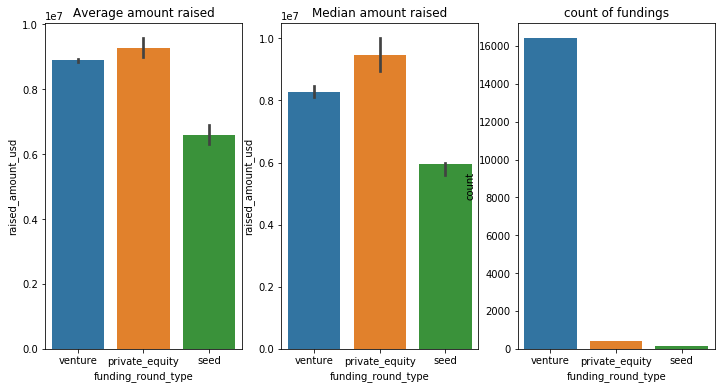

In [79]:
# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 3, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=fund_type)
plt.title("Average amount raised")

# subplot 2: statistic=median
plt.subplot(1, 3, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=fund_type, estimator=np.median)
plt.title("Median amount raised")

# subplot 3: statistic=count
plt.subplot(1, 3, 3)
sns.countplot(x='funding_round_type', data=fund_type)
plt.title("count of fundings")

plt.show()

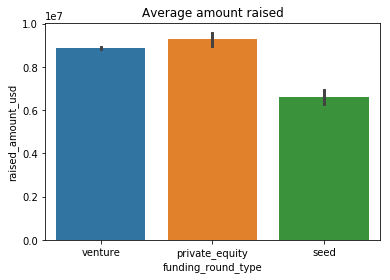

In [83]:
#checkpoint 6
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=fund_type)
plt.title("Average amount raised")
plt.show()

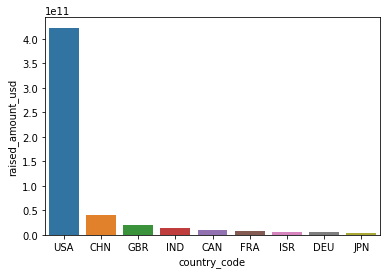

In [80]:
#checkpoint 6
sns.barplot(x='country_code', y = 'raised_amount_usd', data = top9)
plt.show()

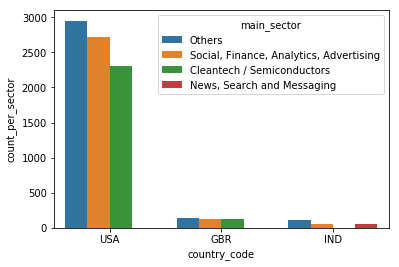

In [81]:
#plot for top3 english speaking countries
sns.barplot(x='country_code',y ='count_per_sector',hue='main_sector', data=plot_top3)
plt.show() # Checkpoint 6